In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
#this is the dataset which is availabe in my github repo
df=pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
#check if the dataset contains any null value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [4]:
#check if there is any duplicates value in the dataset
df.duplicated().sum()

415

In [5]:
# drop the duplicates value from the dataset
df=df.drop_duplicates(keep='first')

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# Assign spam to 1 and ham to 0 
df.loc[df["Category"]=="ham","Category"]=0
df.loc[df["Category"]=="spam","Category"]=1

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#check the no of spam and ham mails on the dataset
df["Category"].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [10]:
# the dataset has imbalance data

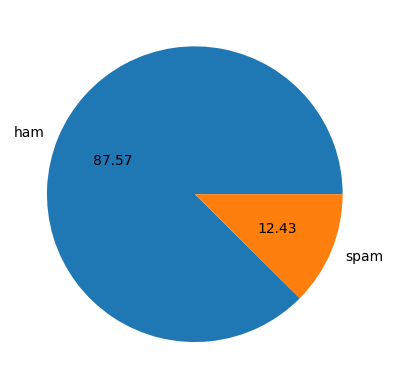

In [11]:
# view the distributio of ham and spam data in the piechart
import matplotlib.pyplot as plt
plt.pie(df["Category"].value_counts(),labels=["ham","spam"],autopct="%.02f")
plt.show()

In [12]:
# import nltk(natural language toolkit) libary 
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to C:\Users\salan
[nltk_data]     katwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\salan
[nltk_data]     katwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\salan
[nltk_data]     katwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# Data PreProcessing to make data more revelant for the model
#  1. LowerCase
#   2. Tokenization
#   3. Removing Special Character
#   4. Removing stop words and punctuation
#    5. Stemming

In [14]:
# import the necessary libray for data pre processing
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [15]:
def transform_text(text):
    
    # convert the text into lower case
    text=text.lower()
    
    # separate the words and make the list
    text=nltk.word_tokenize(text)
    
    # remove the special character
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove the stop words and punctuation
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    # perform stemming like loving,loved,love will be converted to love
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    # return the text as a string
    return " ".join(y)

In [16]:
# transform the Message column of the dataset 
df["transformed_text"]=df["Message"].apply(transform_text)

In [17]:
df.head()

,Category,Message,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [18]:
# let's visualize the most repeated words for ham and spam 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10)

The most repeated words for spam


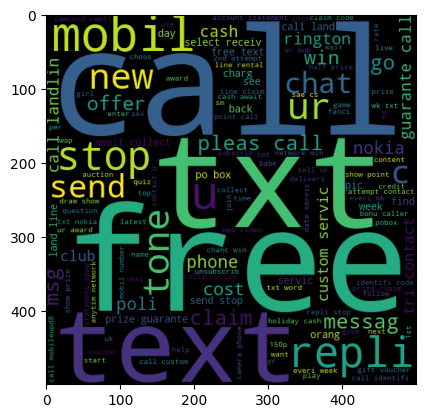

In [35]:
spam_wc=wc.generate(df[df["Category"]==1]["transformed_text"].str.cat(sep=""))
print("The most repeated words for spam")
plt.imshow(spam_wc)

The most repeated words for ham


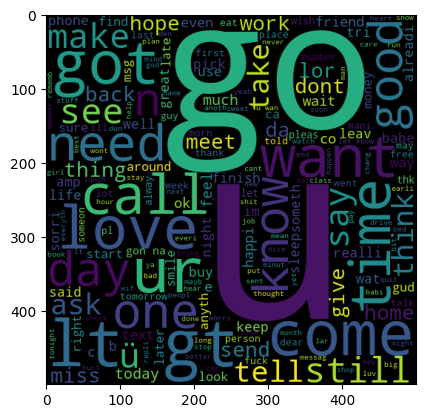

In [36]:
ham_wc=wc.generate(df[df["Category"]==0]["transformed_text"].str.cat(sep=""))
print("The most repeated words for ham")
plt.imshow(ham_wc)

# Model Building

In [21]:
# particulary for classfication with text documnets we must convert the text documents into numbers to 
# allow our model to train it so we import CountVectorizer and TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=4200)

In [37]:
# i have tested with both CountVectorizer and TfidfVectorizer but TfidfVectorizer works better
# Prepare the data for splitting into training and testing set
X=tfidf.fit_transform(df["transformed_text"]).toarray()
print(X.shape)
y=df["Category"].values
# since the data in the y series are not in int so we convert it into integer
y=y.astype('int')
y.dtype

(5157, 4200)


dtype('int32')

In [25]:
# split the dataset into training and testing dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [38]:
# so we first try with naive_bayes as it is good with classification problem
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# Initialize the model
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [39]:
# fit the data using GaussianNB and check the accuracy_score, precision_score and look the confusion matrix
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.8837209302325582
0.5357142857142857
[[792 104]
 [ 16 120]]


In [43]:
# fit the data using MultinomialNB and check the accuracy_score, precision_score and look the confusion matrix
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9728682170542635
1.0
[[896   0]
 [ 28 108]]


In [30]:
# fit the data using BernoulliNB() and check the accuracy_score, precision_score and look the confusion matrix
bnb.fit(X_train,y_train)
y_pred3=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9728682170542635
1.0
[[896   0]
 [ 28 108]]


In [31]:
# Our BernoulliNB and MultinomialNB seems to have accuracy_score and precision_score of 1.0 which is very good
# But let's check other model also
# so we use LogiscticRegression 
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred4=model.predict(X_test)
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

0.9583333333333334
0.9696969696969697
[[893   3]
 [ 40  96]]


In [41]:
# let's check with RamdomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100,random_state=20)
rfc.fit(X_train,y_train)
y_pred5=rfc.predict(X_test)
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

0.9748062015503876
0.9741379310344828
[[893   3]
 [ 23 113]]


# Although you can use GridSearchCV to select the best parameters and model but i like to use different model manullay and train the data

# As we can see BernoulliNB and MultinomialNB are performing well among all the model so we will use MultinomialNB model

In [32]:
# lets see with real life example to test the model
email="""A [redacted] loan is approved for you if you recieve this sms. 1 min verification and cash in 1 hr in
www.[redacted].co.uk to opt out reply stop"""

# transform the input
input_text= transform_text(email)
print(input_text)

redact loan approv reciev sm 1 min verif cash 1 hr www redact opt repli stop


In [33]:
# vectorize the input
input_transform=tfidf.transform([input_text]).toarray()
print(input_transform)
print(input_transform.shape)

[[0. 0. 0. ... 0. 0. 0.]]
(1, 4200)


In [44]:
# and finally predict the model
spam_prediction=mnb.predict(input_transform)
if spam_prediction==1:
    print("Spam")
else:
    print("Not spam")

Spam


In [45]:
import pickle
pickle.dump(tfidf,open("Vectorizer.pkl",'wb'))
pickle.dump(mnb,open('model.pkl','wb'))